<a href="https://colab.research.google.com/github/Charan-AB/Neural-networks-/blob/main/Agriculuture_crop_recognition_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
\
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Accessing the data

In [3]:
data_gen = ImageDataGenerator(zoom_range=0.2, rotation_range=0.2, horizontal_flip=True, rescale=1.0 / 255.0)

In [4]:
train_data = data_gen.flow_from_directory(directory="/content/drive/MyDrive/agriculture/kag2", target_size=(224, 224))

Found 804 images belonging to 5 classes.


In [5]:
val_data = data_gen.flow_from_directory(directory="/content/drive/MyDrive/agriculture/crop_images", target_size=(224, 224))

Found 201 images belonging to 5 classes.


In [ ]:
train_data[0][0][0]

array([[[0.9428925 , 0.9960785 , 0.9912989 ],
        [0.9429286 , 0.9960785 , 0.9912809 ],
        [0.9429647 , 0.9960785 , 0.9912628 ],
        ...,
        [0.6745098 , 0.82860255, 0.92664176],
        [0.6745098 , 0.8285485 , 0.9265877 ],
        [0.6745098 , 0.82849437, 0.9265336 ]],

       [[0.92780834, 0.99386847, 0.9971835 ],
        [0.9278534 , 0.9938865 , 0.9971745 ],
        [0.9278985 , 0.9939046 , 0.99716544],
        ...,
        [0.68664235, 0.8586708 , 0.9506437 ],
        [0.6866063 , 0.8585896 , 0.9505806 ],
        [0.6865702 , 0.8585084 , 0.9505175 ]],

       [[0.90626484, 0.98348767, 0.9986436 ],
        [0.906364  , 0.9835508 , 0.9986616 ],
        [0.90646327, 0.9836139 , 0.99867964],
        ...,
        [0.70583427, 0.8875176 , 0.9698946 ],
        [0.70578015, 0.88744545, 0.9698495 ],
        [0.705726  , 0.88737327, 0.9698044 ]],

       ...,

       [[0.2977265 , 0.30290318, 0.25592253],
        [0.29783475, 0.30302945, 0.25602174],
        [0.29794303, 0

In [ ]:
train_data.class_indices

{'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/agriculture/Crop_details.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.head()

,path,crop,croplabel
0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg,sugarcane,3
1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg,sugarcane,3
2,/kaggle/input/kag2/sugarcane/sugarcane032arot....,sugarcane,3
3,/kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg,sugarcane,3
4,/kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg,sugarcane,3


In [ ]:
train_data

In [ ]:
train_data[0][0].shape

(32, 224, 224, 3)

In [ ]:
train_data[0][1].shape

(32, 5)

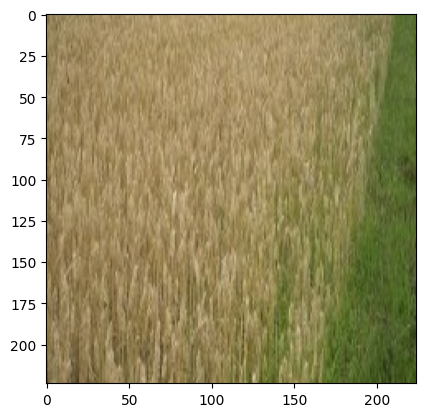

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image
image_path = "/content/drive/MyDrive/agriculture/crop_images/wheat/wheat0001a.jpeg"
original_image = Image.open(image_path)
plt.imshow(original_image)

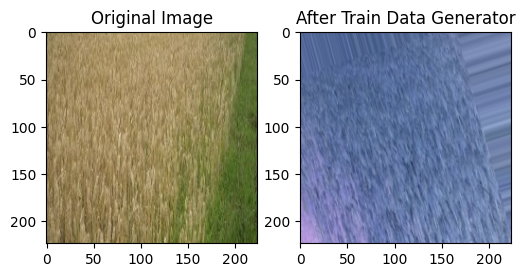

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    rescale=1.0 / 255.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

original_image_array = np.array(original_image)

train_image = train_datagen.random_transform(original_image_array)
train_image = Image.fromarray((train_image * 255).astype(np.uint8))

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(train_image)
plt.title("After Train Data Generator")

plt.show()

In [ ]:
original_image_array.shape

(224, 224, 3)

In [ ]:
original_image_array

array([[[132, 117,  76],
        [140, 125,  84],
        [156, 141, 100],
        ...,
        [ 92, 112,  53],
        [ 86, 107,  48],
        [ 88, 110,  48]],

       [[137, 122,  81],
        [136, 121,  80],
        [155, 140,  99],
        ...,
        [ 95, 115,  56],
        [ 87, 108,  49],
        [ 88, 110,  48]],

       [[144, 129,  88],
        [130, 115,  74],
        [153, 138,  97],
        ...,
        [ 97, 117,  58],
        [ 87, 108,  49],
        [ 87, 109,  47]],

       ...,

       [[ 84,  66,  28],
        [122, 104,  66],
        [126, 110,  74],
        ...,
        [ 69,  90,  31],
        [ 65,  89,  29],
        [ 60,  84,  24]],

       [[ 73,  55,  17],
        [119, 101,  63],
        [130, 114,  78],
        ...,
        [ 71,  92,  33],
        [ 62,  86,  26],
        [ 66,  90,  30]],

       [[ 63,  45,   7],
        [114,  99,  60],
        [132, 116,  80],
        ...,
        [ 74,  95,  36],
        [ 60,  84,  24],
        [ 68,  92,  32]]

In [ ]:
original_image_array/255

array([[[0.51764706, 0.45882353, 0.29803922],
        [0.54901961, 0.49019608, 0.32941176],
        [0.61176471, 0.55294118, 0.39215686],
        ...,
        [0.36078431, 0.43921569, 0.20784314],
        [0.3372549 , 0.41960784, 0.18823529],
        [0.34509804, 0.43137255, 0.18823529]],

       [[0.5372549 , 0.47843137, 0.31764706],
        [0.53333333, 0.4745098 , 0.31372549],
        [0.60784314, 0.54901961, 0.38823529],
        ...,
        [0.37254902, 0.45098039, 0.21960784],
        [0.34117647, 0.42352941, 0.19215686],
        [0.34509804, 0.43137255, 0.18823529]],

       [[0.56470588, 0.50588235, 0.34509804],
        [0.50980392, 0.45098039, 0.29019608],
        [0.6       , 0.54117647, 0.38039216],
        ...,
        [0.38039216, 0.45882353, 0.22745098],
        [0.34117647, 0.42352941, 0.19215686],
        [0.34117647, 0.42745098, 0.18431373]],

       ...,

       [[0.32941176, 0.25882353, 0.10980392],
        [0.47843137, 0.40784314, 0.25882353],
        [0.49411765, 0

In [ ]:
print("Shape of training data :", train_data[0][0].shape)
print("Shape of training labels :", train_data[0][1].shape)

print("Shape of validation data :", val_data[0][0].shape)
print("Shape of validation labels :", val_data[0][1].shape)

print("Shape of test data :", test_data[0][0].shape)
print("Shape of test labels :", test_data[0][1].shape)

Shape of training data : (32, 224, 224, 3)
Shape of training labels : (32, 5)
Shape of validation data : (32, 224, 224, 3)
Shape of validation labels : (32, 5)
Shape of test data : (32, 224, 224, 3)
Shape of test labels : (32, 5)


**General CNN model**

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPool2D())
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(4, 4)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_204 (Conv2D)         (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_205 (Conv2D)         (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 64)          0

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)

Epoch 1/10
26/26 [==============================] - 63s 2s/step - loss: 1.5827 - accuracy: 0.2649 - val_loss: 1.4605 - val_accuracy: 0.3881
Epoch 2/10
26/26 [==============================] - 60s 2s/step - loss: 1.3459 - accuracy: 0.4279 - val_loss: 1.2542 - val_accuracy: 0.4627
Epoch 3/10
26/26 [==============================] - 59s 2s/step - loss: 1.2611 - accuracy: 0.4602 - val_loss: 1.2168 - val_accuracy: 0.4925
Epoch 4/10
26/26 [==============================] - 58s 2s/step - loss: 1.2358 - accuracy: 0.4664 - val_loss: 1.1406 - val_accuracy: 0.5323
Epoch 5/10
26/26 [==============================] - 59s 2s/step - loss: 1.0868 - accuracy: 0.5547 - val_loss: 1.1411 - val_accuracy: 0.5423
Epoch 6/10
26/26 [==============================] - 55s 2s/step - loss: 1.0449 - accuracy: 0.5522 - val_loss: 0.9123 - val_accuracy: 0.6020
Epoch 7/10
26/26 [==============================] - 72s 3s/step - loss: 0.9451 - accuracy: 0.6070 - val_loss: 0.8550 - val_accuracy: 0.6517
Epoch 8/10
26/26 [==

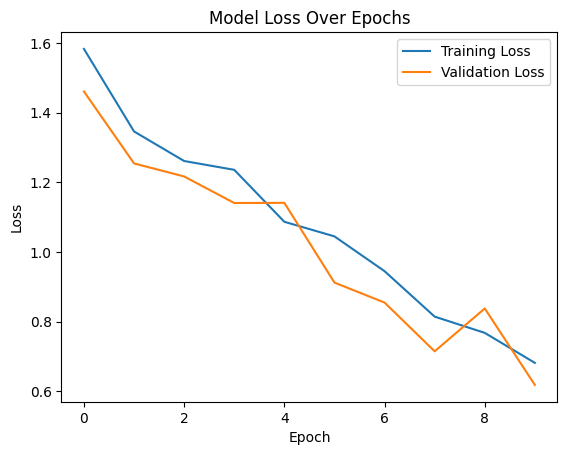

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):

    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

model_hist = {
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

plot_loss(model_hist)


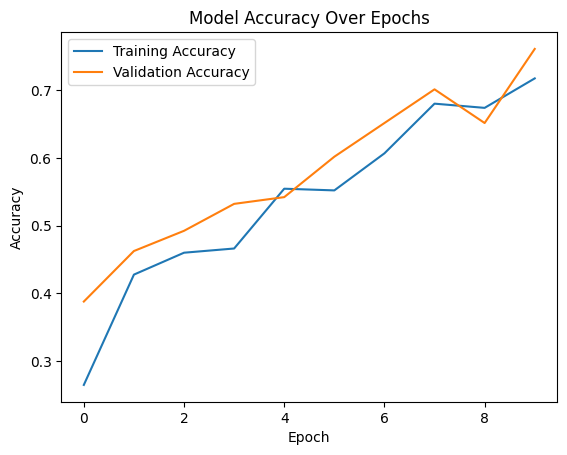

In [ ]:
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [27]:
import cv2


In [25]:
def get_class_name(filename):
    if filename[:4] == 'jute':
        return 'jute'
    elif filename[:5] == 'maize':
        return 'maize'
    elif filename[:4] == 'rice':
        return 'rice'
    elif filename[:9] == 'sugarcane':
        return 'sugarcane'
    elif filename[:5] == 'wheat':
        return 'wheat'
    else:
        return 'none'

In [ ]:
data = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']


In [24]:
def get_pred(filename, m):
    img = cv2.imread('/content/drive/MyDrive/agriculture/test_crop_image/' + filename)
    img = cv2.resize(img, (224, 224))/255
    img = img.reshape(1, 224, 224, 3)
    yp = m.predict(img).argmax()
    return yp

In [ ]:
import os
filenames = os.listdir('/content/drive/MyDrive/agriculture/test_crop_image')
filenames

['wheatcropfield.jpg',
 'maizecornleaves.jfif',
 'wheat-field01.jpg',
 'maize images.jfif',
 'wheat-field03.jpg',
 'wheatarial02.jpg',
 'maize-Field-Corn.jpg',
 'maize-field.jpg',
 'rice-828540_1280.jpg',
 'maize00corn-fields.jpg',
 'rice-fields-204128_1280.jpg',
 'sugarcane-field8.jpg',
 'sugarcaneplants.jpg',
 'rice-5174887_1280.jpg',
 'rice-field.jpg',
 'jute-field.jpg',
 'juteplants.jpg',
 'maize-field01.jpg',
 'wheatcropfield04.jpg',
 'maize plant set.jpg',
 'jutefield.jpg',
 'sugarcane fields.jpg',
 'rice-4967164_1280.jpg',
 'juteplant.jpg',
 'jute003.jpg',
 'sugarcaneplant.jpg',
 'wheat.jpg',
 'sugarcanefield.jpg',
 'juteimg.jpg',
 'jute002.jpg',
 'sugarcanefield02.jpg',
 'rice-field02.jpg',
 'rice-field01.jpg',
 'sugarcane-farm-in-the-mountain-countryside-of-thailand.jpg',
 'juteleaves.jpg',
 'wheat-crop.jpg',
 'wheatcrops.jpg',
 'wheat-field-artificial-irrigation-rural-electrification-to-harvest-166395991.jpg',
 'wheatcrop01.jpg',
 'wheatarialview.jfif',
 'wheat-field-395545_9

In [ ]:
preds_model = []
true_classes = []
predicted_classes = []
for file in filenames:
    yp = data[get_pred(file, model)]
    predicted_classes.append(yp)
    ya = get_class_name(file)
    true_classes.append(ya)
    pred = (yp == ya)
    preds_model.append(pred)
    print(file, yp, ya, pred)

1/1 [==============================] - 0s 57ms/step
wheatcropfield.jpg sugarcane wheat False
1/1 [==============================] - 0s 72ms/step
maizecornleaves.jfif maize maize True
1/1 [==============================] - 0s 59ms/step
wheat-field01.jpg maize wheat False
1/1 [==============================] - 0s 57ms/step
maize images.jfif jute maize False
1/1 [==============================] - 0s 58ms/step
wheat-field03.jpg maize wheat False
1/1 [==============================] - 0s 56ms/step
wheatarial02.jpg maize wheat False
1/1 [==============================] - 0s 64ms/step
maize-Field-Corn.jpg sugarcane maize False
1/1 [==============================] - 0s 63ms/step
maize-field.jpg maize maize True
1/1 [==============================] - 0s 61ms/step
rice-828540_1280.jpg sugarcane rice False
1/1 [==============================] - 0s 56ms/step
maize00corn-fields.jpg maize maize True
1/1 [==============================] - 0s 50ms/step
rice-fields-204128_1280.jpg maize rice False
1/1 

In [ ]:
true_classes

['wheat',
 'maize',
 'wheat',
 'maize',
 'wheat',
 'wheat',
 'maize',
 'maize',
 'rice',
 'maize',
 'rice',
 'sugarcane',
 'sugarcane',
 'rice',
 'rice',
 'jute',
 'jute',
 'maize',
 'wheat',
 'maize',
 'jute',
 'sugarcane',
 'rice',
 'jute',
 'jute',
 'sugarcane',
 'wheat',
 'sugarcane',
 'jute',
 'jute',
 'sugarcane',
 'rice',
 'rice',
 'sugarcane',
 'jute',
 'wheat',
 'wheat',
 'wheat',
 'wheat',
 'wheat',
 'wheat',
 'rice',
 'maize',
 'maize',
 'maize',
 'wheat',
 'wheat',
 'jute',
 'maize',
 'wheat',
 'sugarcane']

In [ ]:
predicted_classes

['sugarcane',
 'maize',
 'maize',
 'jute',
 'maize',
 'maize',
 'sugarcane',
 'maize',
 'sugarcane',
 'maize',
 'maize',
 'sugarcane',
 'sugarcane',
 'sugarcane',
 'sugarcane',
 'jute',
 'jute',
 'maize',
 'sugarcane',
 'sugarcane',
 'sugarcane',
 'maize',
 'rice',
 'jute',
 'jute',
 'sugarcane',
 'maize',
 'maize',
 'rice',
 'jute',
 'maize',
 'rice',
 'jute',
 'sugarcane',
 'jute',
 'maize',
 'sugarcane',
 'sugarcane',
 'maize',
 'sugarcane',
 'sugarcane',
 'jute',
 'maize',
 'sugarcane',
 'jute',
 'maize',
 'sugarcane',
 'jute',
 'maize',
 'sugarcane',
 'maize']

In [ ]:
acc_model = sum(preds_model)/len(preds_model)
acc_model

0.37254901960784315

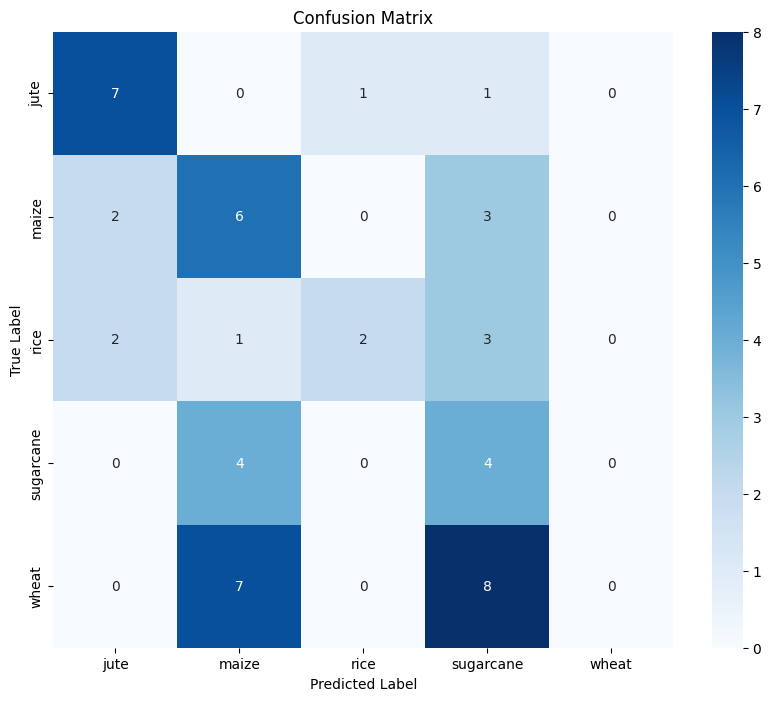

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.class_indices, yticklabels=train_data.class_indices)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**ResNet model**

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

resnet = InceptionResNetV2(include_top=False)

resnet.trainable = True

inputs2 = tf.keras.layers.Input(shape=(224, 224, 3), name="input-layer")
x2 = resnet(inputs2)
x2 = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x2)
outputs2 = tf.keras.layers.Dense(5, activation="softmax", name="output-layer")(x2)
model_2 = tf.keras.Model(inputs2, outputs2)

# Compile the model for fine-tuning
model_2.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"], run_eagerly=True)

# Early stopping
early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)


In [ ]:
history_2 = model_2.fit(train_data, epochs=3, validation_data=val_data, verbose=1)

Epoch 1/3
26/26 [==============================] - 1323s 51s/step - loss: 1.0061 - accuracy: 0.6318 - val_loss: 1.1248 - val_accuracy: 0.5920
Epoch 2/3
26/26 [==============================] - 1299s 50s/step - loss: 0.1765 - accuracy: 0.9627 - val_loss: 0.4351 - val_accuracy: 0.8259
Epoch 3/3
26/26 [==============================] - 1292s 50s/step - loss: 0.0473 - accuracy: 0.9900 - val_loss: 0.2273 - val_accuracy: 0.9204


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling_lay  (None, 1536)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output-layer (Dense)        (None, 5)                 7685      
                                                                 
Total params: 54344421 (207.31 MB)
Trainable params: 54283877 (207.08 MB)
Non-trainable params: 60544 (236.50 KB)
_____________

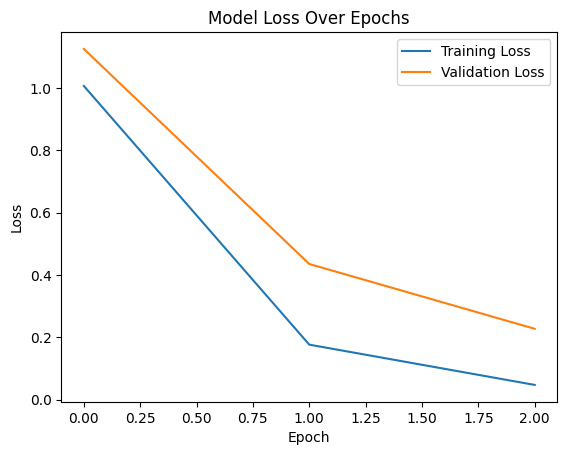

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):

    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

model_hist = {
    'loss': history_2.history['loss'],
    'val_loss': history_2.history['val_loss']
}

plot_loss(model_hist)


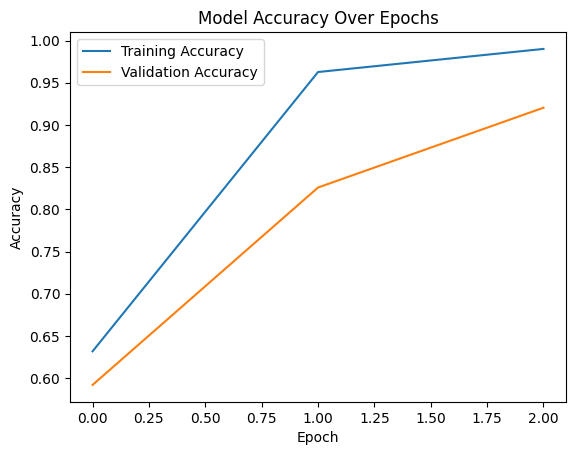

In [ ]:
  plt.plot(history_2.history['accuracy'], label='Training Accuracy')
  plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
preds_model_resnet = []
true_classes_resnet = []
predicted_classes_resnet = []
for file in filenames:
    yp = data[get_pred(file, model_2)]
    predicted_classes_resnet.append(yp)
    ya = get_class_name(file)
    true_classes_resnet.append(ya)
    pred = (yp == ya)
    preds_model_resnet.append(pred)
    print(file, yp, ya, pred)

1/1 [==============================] - 1s 1s/step
wheatcropfield.jpg wheat wheat True
1/1 [==============================] - 1s 1s/step
maizecornleaves.jfif sugarcane maize False
1/1 [==============================] - 1s 1s/step
wheat-field01.jpg sugarcane wheat False
1/1 [==============================] - 1s 1s/step
maize images.jfif maize maize True
1/1 [==============================] - 1s 1s/step
wheat-field03.jpg sugarcane wheat False
1/1 [==============================] - 1s 1s/step
wheatarial02.jpg sugarcane wheat False
1/1 [==============================] - 2s 2s/step
maize-Field-Corn.jpg maize maize True
1/1 [==============================] - 1s 1s/step
maize-field.jpg maize maize True
1/1 [==============================] - 1s 1s/step
rice-828540_1280.jpg maize rice False
1/1 [==============================] - 2s 2s/step
maize00corn-fields.jpg maize maize True
1/1 [==============================] - 1s 1s/step
rice-fields-204128_1280.jpg rice rice True
1/1 [====================

In [ ]:
acc_model = sum(preds_model_resnet)/len(preds_model_resnet)
acc_model

0.5294117647058824

In [ ]:
true_classes_resnet

['wheat',
 'maize',
 'wheat',
 'maize',
 'wheat',
 'wheat',
 'maize',
 'maize',
 'rice',
 'maize',
 'rice',
 'sugarcane',
 'sugarcane',
 'rice',
 'rice',
 'jute',
 'jute',
 'maize',
 'wheat',
 'maize',
 'jute',
 'sugarcane',
 'rice',
 'jute',
 'jute',
 'sugarcane',
 'wheat',
 'sugarcane',
 'jute',
 'jute',
 'sugarcane',
 'rice',
 'rice',
 'sugarcane',
 'jute',
 'wheat',
 'wheat',
 'wheat',
 'wheat',
 'wheat',
 'wheat',
 'rice',
 'maize',
 'maize',
 'maize',
 'wheat',
 'wheat',
 'jute',
 'maize',
 'wheat',
 'sugarcane']

In [ ]:
predicted_classes_resnet

['wheat',
 'sugarcane',
 'sugarcane',
 'maize',
 'sugarcane',
 'sugarcane',
 'maize',
 'maize',
 'maize',
 'maize',
 'rice',
 'maize',
 'sugarcane',
 'sugarcane',
 'rice',
 'jute',
 'maize',
 'maize',
 'wheat',
 'maize',
 'sugarcane',
 'maize',
 'rice',
 'maize',
 'rice',
 'jute',
 'wheat',
 'maize',
 'rice',
 'sugarcane',
 'maize',
 'maize',
 'maize',
 'maize',
 'jute',
 'wheat',
 'wheat',
 'maize',
 'wheat',
 'wheat',
 'wheat',
 'maize',
 'maize',
 'maize',
 'maize',
 'maize',
 'wheat',
 'jute',
 'maize',
 'wheat',
 'maize']

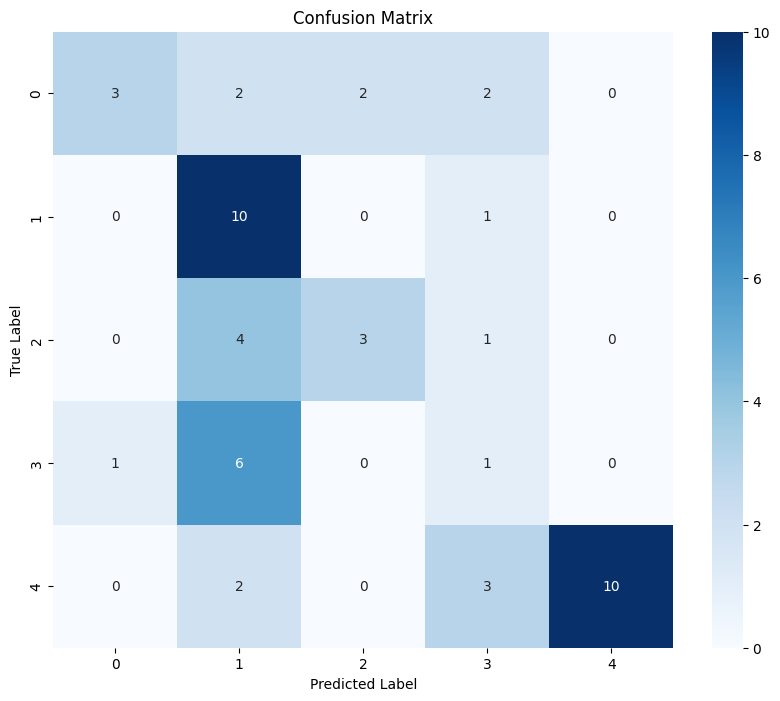

In [ ]:
conf_matrix = confusion_matrix(true_classes_resnet, predicted_classes_resnet)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**VGG 16**

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False,input_shape=(224, 224, 3))
for layer in vgg16.layers:
    layer.trainable = False
vgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
last_layer = Dense(5, activation='softmax')(Flatten()(vgg16.output))
model_vgg = Model(inputs = vgg16.input, outputs = last_layer)
model_vgg.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history_vgg = model_vgg.fit(train_data, epochs=5)

Epoch 1/5
26/26 [==============================] - 522s 20s/step - loss: 0.2965 - accuracy: 0.9092
Epoch 2/5
26/26 [==============================] - 528s 20s/step - loss: 0.3051 - accuracy: 0.8943
Epoch 3/5
26/26 [==============================] - 525s 20s/step - loss: 0.1833 - accuracy: 0.9453
Epoch 4/5
26/26 [==============================] - 522s 20s/step - loss: 0.2114 - accuracy: 0.9415
Epoch 5/5
26/26 [==============================] - 597s 23s/step - loss: 0.1458 - accuracy: 0.9590


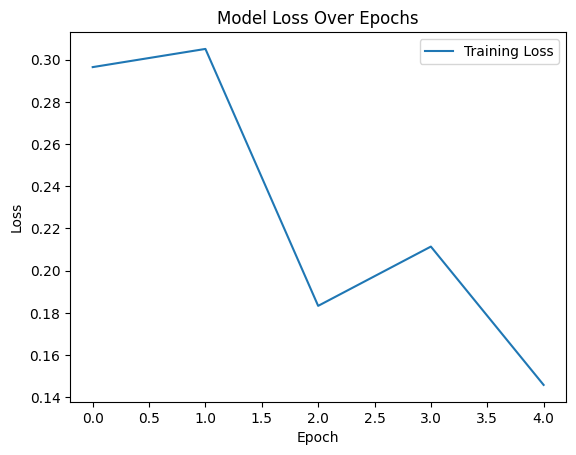

In [17]:
import matplotlib.pyplot as plt

def plot_loss(history):

    plt.plot(history['loss'], label='Training Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

model_hist = {
    'loss': history_vgg.history['loss'],
}

plot_loss(model_hist)


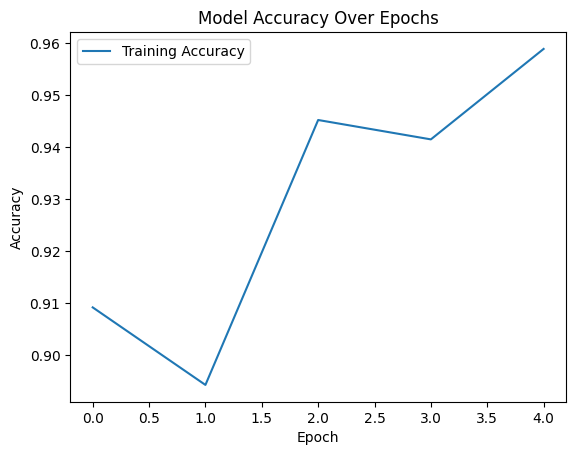

In [18]:
  plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
  plt.title('Model Accuracy Over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [20]:
import os
filenames = os.listdir('/content/drive/MyDrive/agriculture/test_crop_image')


In [22]:
data = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']


In [28]:
preds_model_vgg = []
true_classes_vgg = []
predicted_classes_vgg = []
for file in filenames:
    yp = data[get_pred(file, model_vgg)]
    predicted_classes_vgg.append(yp)
    ya = get_class_name(file)
    true_classes_vgg.append(ya)
    pred = (yp == ya)
    preds_model_vgg.append(pred)
    print(file, yp, ya, pred)

1/1 [==============================] - 1s 708ms/step
juteimg.jpg jute jute True
1/1 [==============================] - 1s 545ms/step
jute03.jpg jute jute True
1/1 [==============================] - 1s 551ms/step
jutefield.jpg jute jute True
1/1 [==============================] - 1s 537ms/step
jute003.jpg jute jute True
1/1 [==============================] - 1s 760ms/step
jute-field.jpg jute jute True
1/1 [==============================] - 1s 952ms/step
jute002.jpg jute jute True
1/1 [==============================] - 1s 902ms/step
maize corn set2.jpg wheat maize False
1/1 [==============================] - 1s 991ms/step
sugarcane-farm-in-the-mountain-countryside-of-thailand.jpg sugarcane sugarcane True
1/1 [==============================] - 1s 979ms/step
rice8122f869e3f.jpg rice rice True
1/1 [==============================] - 1s 828ms/step
wheat.jpg wheat wheat True
1/1 [==============================] - 1s 548ms/step
rice-5174887_1280.jpg jute rice False
1/1 [========================

In [29]:
acc_model = sum(preds_model_vgg)/len(preds_model_vgg)
acc_model

0.47058823529411764

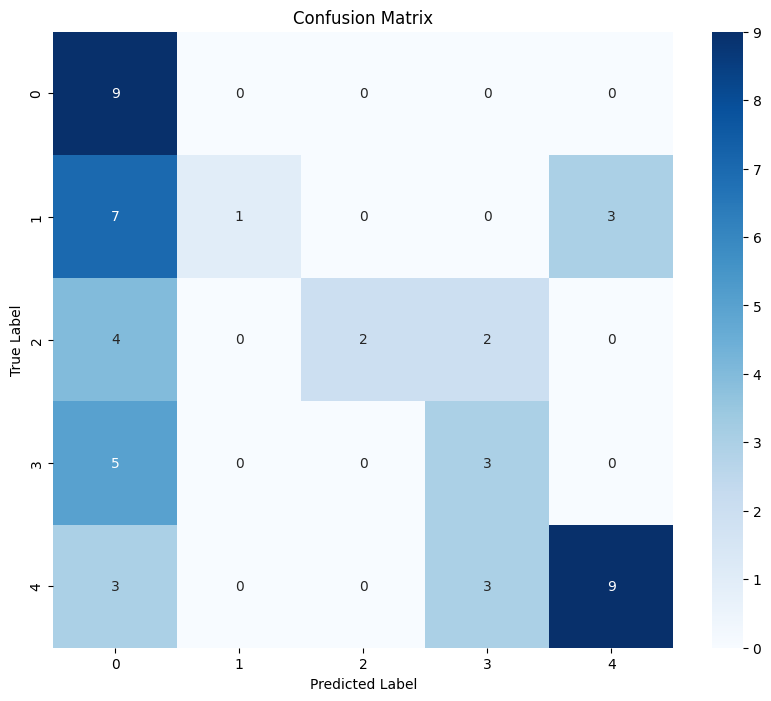

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_classes_vgg, predicted_classes_vgg)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()